In [1]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from datetime import datetime,timedelta
from classes import Portfolio
import matplotlib.pyplot as plt
from asset_database import DICT_ASSET_INFO
from tools import get_value,plot_actual_postion,compute_position
from anbima_token import ANBIMA_TOKEN,credentials
from historico_tesouro.tresury_history import DICT_TRESURY_HISTORY

current_path = Path.cwd()

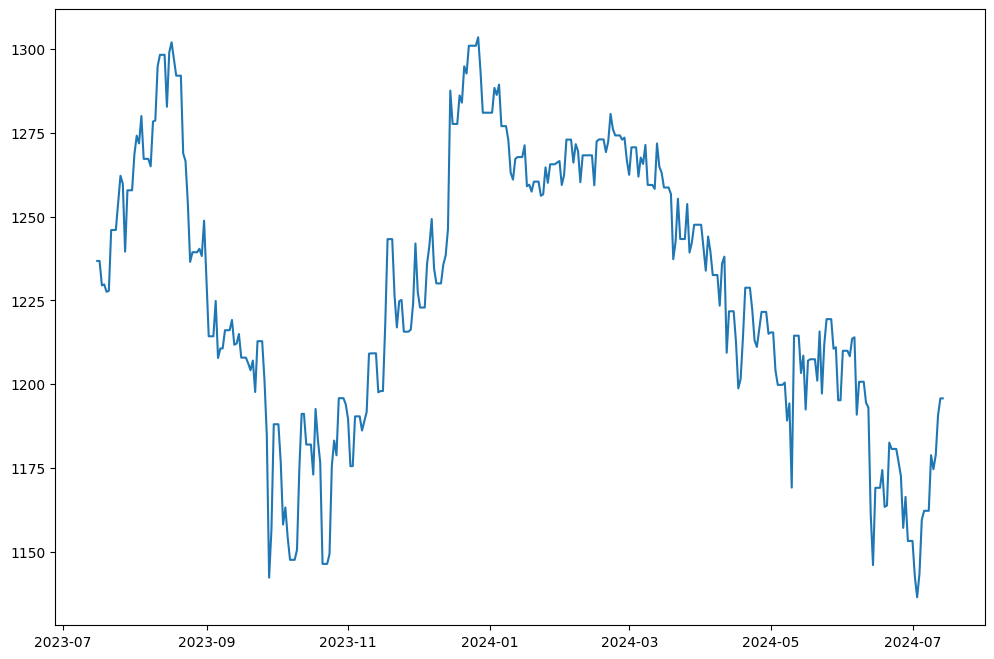

In [2]:
# list_of_dates = [datetime.today() - timedelta(i) for i in range(365)]
# values = [get_value("IPCA+ 2045",date=date) for date in list_of_dates]

# fig, ax = plt.subplots(figsize=(12,8))
# ax.plot(list_of_dates,values)

In [2]:

csv_name = "investimentos_movimentacoes.csv"
raw_data = pd.read_csv(filepath_or_buffer=current_path/csv_name)
list_to_pop = ["Lucro","Imposto","Observação","F sup","Preço médio","Valor total"]
for name in list_to_pop:
    raw_data.pop(name)


data_base = pd.DataFrame()
data_base["owner"] = raw_data["Banco"].apply(lambda text: "Luiz" if text =="Inter" else "Luciane")
data_base["date"] = raw_data["Data operação"].apply(lambda date: datetime.strptime(date,"%d/%m/%Y"))
data_base["ticker"] = raw_data["Nome ativo"]
data_base["buy"] = raw_data["C/V"].apply(lambda text: True if text=="C" else False)
data_base["price"] = raw_data["Preço operação"].apply(lambda price_text: float(''.join(filter(lambda x: x.isdigit() or x in ',', price_text)).replace(",",".")))
data_base["amount"] = raw_data["Qnt"].apply(lambda Qnt: float(Qnt.replace(",",".")))
data_base["curency"] = "BRL"

In [3]:
portfolio_luiz = Portfolio(data_base[data_base["owner"]=="Luiz"].drop("owner",axis=1))
portfolio_luciane = Portfolio(data_base[data_base["owner"]=="Luciane"].drop("owner",axis=1))

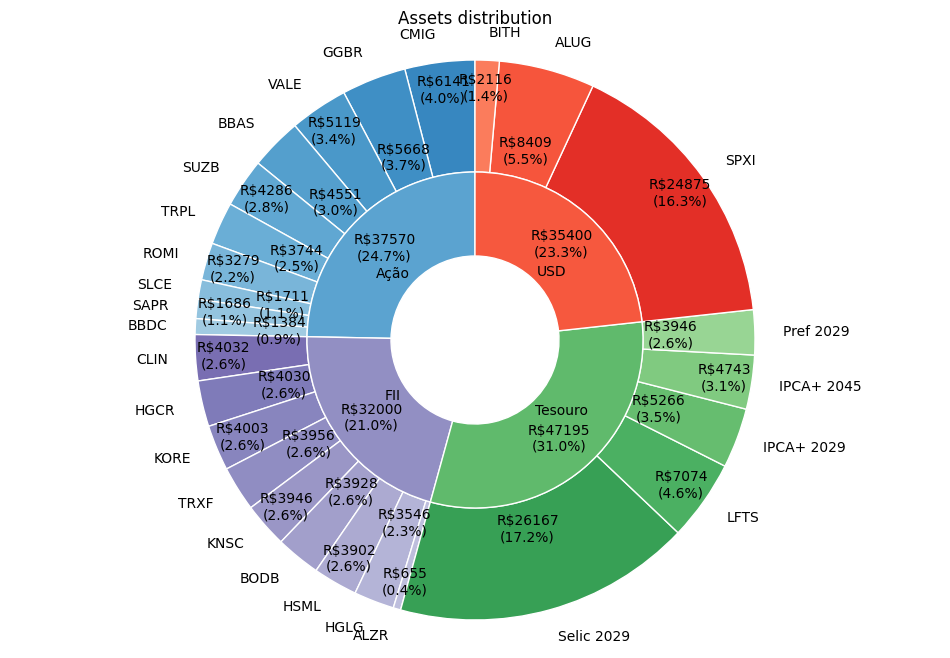

In [17]:
position, old = compute_position(portfolio_luciane.data_base,date=datetime(2024,6,1))
plot_actual_postion(position)

In [ ]:
datetime

In [ ]:
import tkinter as tk

def on_click():
    portfolio_luciane.plot_actual_postion()

app = tk.Tk()
app.title("Simple Tkinter App")

label = tk.Label(app, text="Hello, Tkinter!")
label.pack()

button = tk.Button(app, text="Click Me", command=on_click)
button.pack()

app.mainloop()